<a href="https://colab.research.google.com/github/bhavanamatcha/randomwalk-ds-assessment-level2/blob/main/Random_Walk_AI.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [11]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


penguins = sns.load_dataset("penguins")


print("Missing values:\n", penguins.isnull().sum())


penguins_cleaned = penguins.dropna()


print("\nCleaned Dataset:\n", penguins_cleaned.info())


Missing values:
 species               0
island                0
bill_length_mm        2
bill_depth_mm         2
flipper_length_mm     2
body_mass_g           2
sex                  11
dtype: int64
<class 'pandas.core.frame.DataFrame'>
Index: 333 entries, 0 to 343
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   species            333 non-null    object 
 1   island             333 non-null    object 
 2   bill_length_mm     333 non-null    float64
 3   bill_depth_mm      333 non-null    float64
 4   flipper_length_mm  333 non-null    float64
 5   body_mass_g        333 non-null    float64
 6   sex                333 non-null    object 
dtypes: float64(4), object(3)
memory usage: 20.8+ KB

Cleaned Dataset:
 None


In [2]:
gentoo_avg_mass = penguins_cleaned[penguins_cleaned['species'] == 'Gentoo']['body_mass_g'].mean()
print("Average body_mass_g for Gentoo penguins:", gentoo_avg_mass)


Average body_mass_g for Gentoo penguins: 5092.436974789916


In [12]:
from scipy.stats import skew, kurtosis


for species in penguins_cleaned['species'].unique():
    species_data = penguins_cleaned[penguins_cleaned['species'] == species]
    for col in ['bill_length_mm', 'bill_depth_mm']:
        print(f"{species} - {col}: Skewness = {skew(species_data[col])}, Kurtosis = {kurtosis(species_data[col])}")


Adelie - bill_length_mm: Skewness = 0.15616184771639763, Kurtosis = -0.18127977896608938
Adelie - bill_depth_mm: Skewness = 0.3115035352606436, Kurtosis = -0.07310656431612017
Chinstrap - bill_length_mm: Skewness = -0.08856426997678174, Kurtosis = -0.05367915496168729
Chinstrap - bill_depth_mm: Skewness = 0.0067259608078862046, Kurtosis = -0.898739653084359
Gentoo - bill_length_mm: Skewness = 0.604343084039309, Kurtosis = 1.1389130098534022
Gentoo - bill_depth_mm: Skewness = 0.297940290009221, Kurtosis = -0.6162344615783639


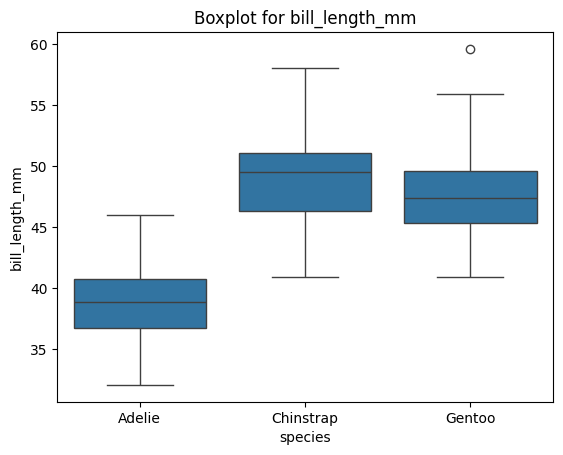

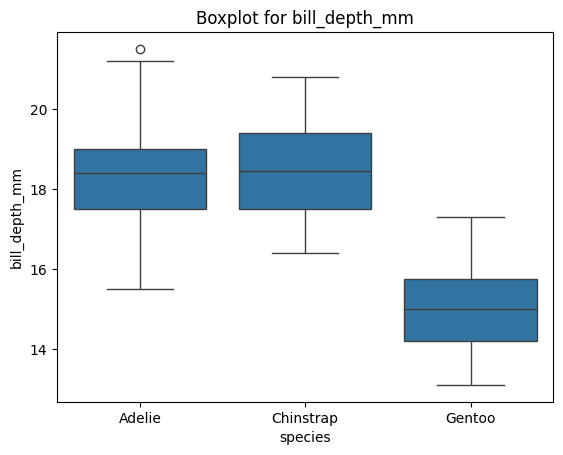

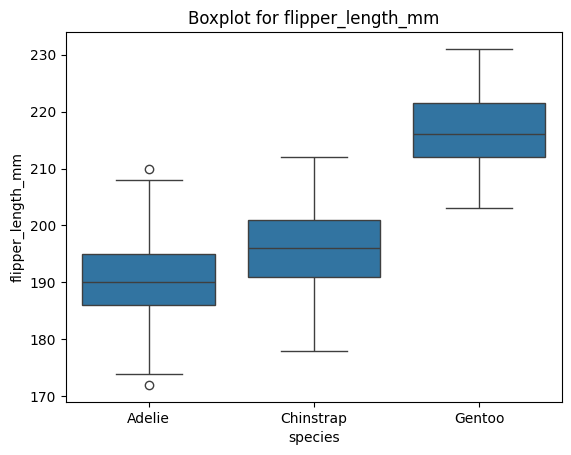

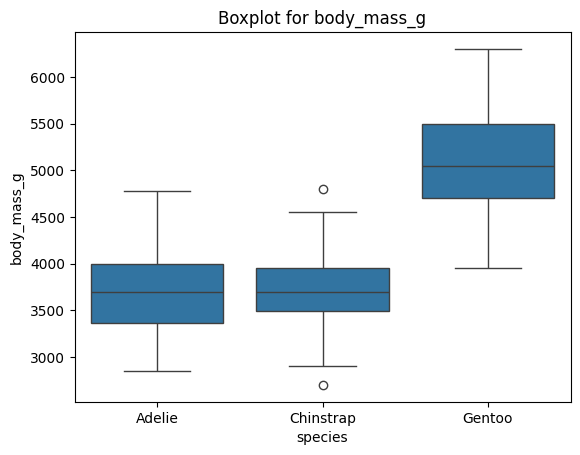

In [14]:
import numpy as np
import seaborn as sns


def detect_outliers(df, col):
    Q1 = np.percentile(df[col].dropna(), 25)
    Q3 = np.percentile(df[col].dropna(), 75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return df[(df[col] < lower_bound) | (df[col] > upper_bound)]


for col in ['bill_length_mm', 'bill_depth_mm', 'flipper_length_mm', 'body_mass_g']:
    sns.boxplot(x='species', y=col, data=penguins_cleaned)
    plt.title(f'Boxplot for {col}')
    plt.show()


In [15]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler


num_features = ['bill_length_mm', 'bill_depth_mm', 'flipper_length_mm', 'body_mass_g']
penguins_scaled = StandardScaler().fit_transform(penguins_cleaned[num_features])


pca = PCA(n_components=2)
pca_result = pca.fit_transform(penguins_scaled)

print("Explained variance ratio by PCA:", pca.explained_variance_ratio_)


Explained variance ratio by PCA: [0.68633893 0.19452929]


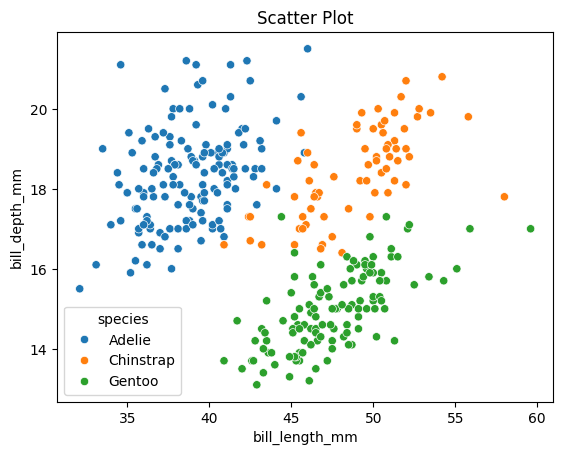

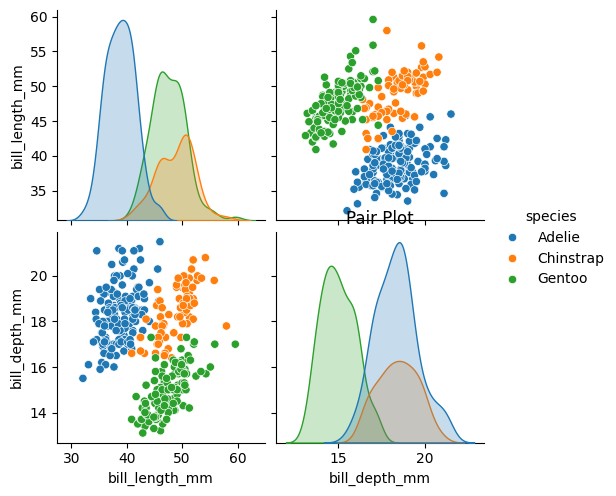

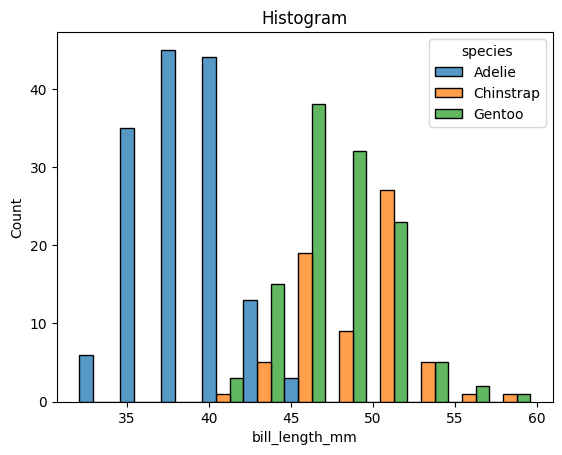

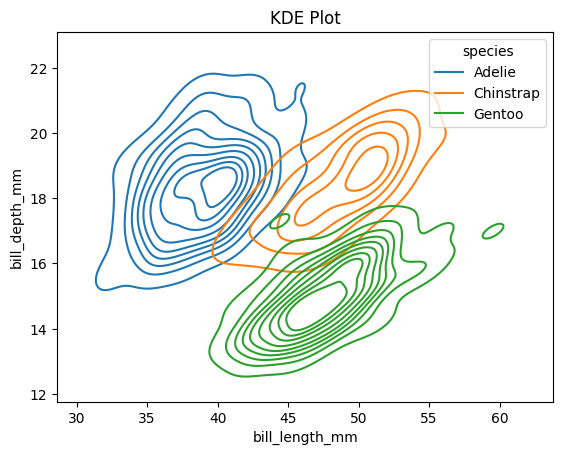

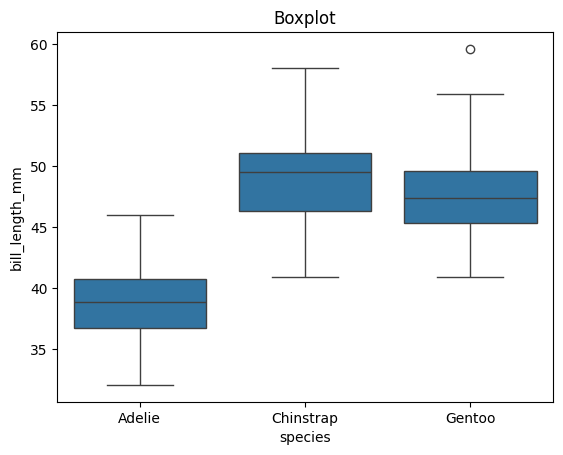

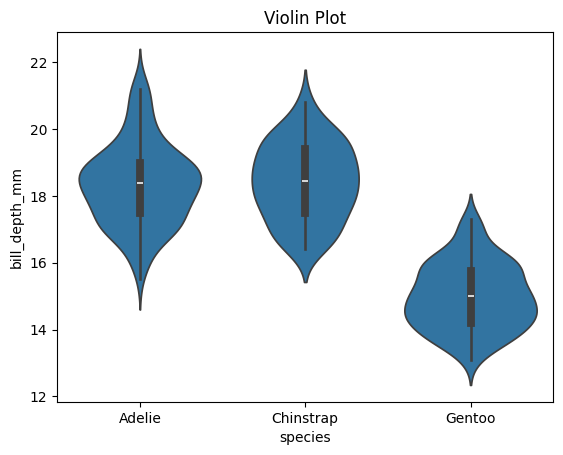

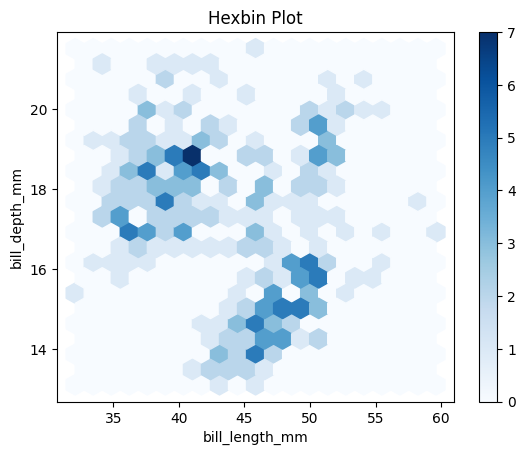

In [18]:

sns.scatterplot(data=penguins_cleaned, x='bill_length_mm', y='bill_depth_mm', hue='species')
plt.title('Scatter Plot')
plt.show()


sns.pairplot(penguins_cleaned, vars=['bill_length_mm', 'bill_depth_mm'], hue='species')
plt.title('Pair Plot')
plt.show()


sns.histplot(data=penguins_cleaned, x='bill_length_mm', hue='species', multiple="dodge")
plt.title('Histogram')
plt.show()


sns.kdeplot(data=penguins_cleaned, x='bill_length_mm', y='bill_depth_mm', hue='species')
plt.title('KDE Plot')
plt.show()


sns.boxplot(x='species', y='bill_length_mm', data=penguins_cleaned)
plt.title('Boxplot')
plt.show()


sns.violinplot(x='species', y='bill_depth_mm', data=penguins_cleaned)
plt.title('Violin Plot')
plt.show()


penguins_cleaned.plot.hexbin(x='bill_length_mm', y='bill_depth_mm', gridsize=20, cmap='Blues')
plt.title('Hexbin Plot')
plt.show()


In [9]:
max_flipper = penguins_cleaned.groupby(['species', 'island'])['flipper_length_mm'].max().reset_index()
print(max_flipper)


     species     island  flipper_length_mm
0     Adelie     Biscoe              203.0
1     Adelie      Dream              208.0
2     Adelie  Torgersen              210.0
3  Chinstrap      Dream              212.0
4     Gentoo     Biscoe              231.0


In [20]:
from scipy.stats import zscore


penguins_normalized = penguins_cleaned.copy()
for col in ['bill_length_mm', 'bill_depth_mm', 'flipper_length_mm', 'body_mass_g']:
    penguins_normalized[col] = zscore(penguins_cleaned[col])

print(penguins_normalized.head())


  species     island  bill_length_mm  bill_depth_mm  flipper_length_mm  \
0  Adelie  Torgersen       -0.896042       0.780732          -1.426752   
1  Adelie  Torgersen       -0.822788       0.119584          -1.069474   
2  Adelie  Torgersen       -0.676280       0.424729          -0.426373   
4  Adelie  Torgersen       -1.335566       1.085877          -0.569284   
5  Adelie  Torgersen       -0.859415       1.747026          -0.783651   

   body_mass_g     sex  
0    -0.568475    Male  
1    -0.506286  Female  
2    -1.190361  Female  
4    -0.941606  Female  
5    -0.692852    Male  
